In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mppi import InputFiles as I, Calculators as C, Datasets as D

In [2]:
omp = 1
mpi_run = 'mpirun -np 16'

# Optical absorption spectrum in the IP approximation

We compute the optical absorption spectrum og GaAs using yambo in the ip approximation with a scissor to reproduce the experimental band gap. We analyze the effects of different samplings in number of k-points (with and without shift). This analysis is analysis is a preliminary step to understand which sampling of k-points is needed to obtain reliable results in the RT study.

In [3]:
code = C.YamboCalculator(omp=omp,mpi_run=mpi_run,executable='yambo',suffix='eps_q1_ip',skip=True)

Initialize a Yambo calculator with command OMP_NUM_THREADS=1 mpirun -np 16 yambo
Suffix for post_processing :  eps_q1_ip


### k=8 no shift

In [4]:
ip_8 = D.Dataset(label='8',run_dir='ip_spectrum_8',pre_processing='yambo')

In [5]:
source = 'nscf/bnds_40-kpoints_8.save'
ip_8.pre_processing_function(source_dir=source)

SAVE folder already present in ip_spectrum_8


In [6]:
yambo_in = I.YamboIn('yambo -o c',folder=ip_8.run_dir)

In [7]:
idd = 'absorption_ip'
yambo_in['LongDrXd'] = [1.00,1.00,1.00] # electric field
yambo_in['BndsRnXd'] = [1,10] # bands considered
yambo_in['QpntsRXd'] = [1,1] # momentum transfer
yambo_in['DmRngeXd'] = [[0.1,0.2],'eV'] # damping range
yambo_in['EnRngeXd'] = [[0,8],'eV'] # energy range
yambo_in['XfnQP_E'] = [1.00,1.00,1.00] # scissor
ip_8.append_run(id=idd,calculator=code,input=yambo_in)

In [8]:
#print(yambo_in)

In [9]:
ip_8.run()

skip the computation for : absorption_ip.in
parse file : ip_spectrum_8/absorption_ip/o-absorption_ip.eps_q1_ip


### k=10 no shift

In [10]:
ip_10 = D.Dataset(label='10',run_dir='ip_spectrum_10',pre_processing='yambo')

In [11]:
source = 'nscf/bnds_40-kpoints_10.save'
ip_10.pre_processing_function(source_dir=source)

SAVE folder already present in ip_spectrum_10


In [12]:
yambo_in = I.YamboIn('yambo -o c',folder=ip_10.run_dir)

In [13]:
idd = 'absorption_ip'
yambo_in['LongDrXd'] = [1.00,1.00,1.00] # electric field
yambo_in['BndsRnXd'] = [1,10] # bands considered
yambo_in['QpntsRXd'] = [1,1] # momentum transfer
yambo_in['DmRngeXd'] = [[0.1,0.2],'eV'] # damping range
yambo_in['EnRngeXd'] = [[0,8],'eV'] # energy range
yambo_in['XfnQP_E'] = [1.00,1.00,1.00] # scissor
ip_10.append_run(id=idd,calculator=code,input=yambo_in)

In [14]:
ip_10.run()

skip the computation for : absorption_ip.in
parse file : ip_spectrum_10/absorption_ip/o-absorption_ip.eps_q1_ip


### k=20 no shift

In [50]:
ip_20 = D.Dataset(label='20',run_dir='ip_spectrum_20',pre_processing='yambo')

In [51]:
source = 'nscf/bnds_40-kpoints_20.save'
ip_20.pre_processing_function(source_dir=source)

Create folder ip_spectrum_20
execute :  cd nscf/bnds_40-kpoints_20.save;p2y -a 2
execute :  cp -r nscf/bnds_40-kpoints_20.save/SAVE ip_spectrum_20
execute :  cd ip_spectrum_20;OMP_NUM_THREADS=1 yambo


In [52]:
yambo_in = I.YamboIn('yambo -o c',folder=ip_20.run_dir)

In [53]:
idd = 'absorption_ip'
yambo_in['LongDrXd'] = [1.00,1.00,1.00] # electric field
yambo_in['BndsRnXd'] = [1,10] # bands considered
yambo_in['QpntsRXd'] = [1,1] # momentum transfer
yambo_in['DmRngeXd'] = [[0.1,0.2],'eV'] # damping range
yambo_in['EnRngeXd'] = [[0,8],'eV'] # energy range
yambo_in['XfnQP_E'] = [1.00,1.00,1.00] # scissor
ip_20.append_run(id=idd,calculator=code,input=yambo_in)

In [54]:
ip_20.run()

execute : cd ip_spectrum_20 ; OMP_NUM_THREADS=1 mpirun -np 16 yambo -F absorption_ip.in -J absorption_ip -C absorption_ip
parse file : ip_spectrum_20/absorption_ip/o-absorption_ip.eps_q1_ip


### k=8 shift

In [15]:
ip_8_shift = D.Dataset(label='8_shift',run_dir='ip_spectrum_8_shift',pre_processing='yambo')

In [16]:
source = 'nscf/bnds_40-kpoints_8-shift_1.save'
ip_8_shift.pre_processing_function(source_dir=source)

SAVE folder already present in ip_spectrum_8_shift


In [17]:
yambo_in = I.YamboIn('yambo -o c',folder=ip_8_shift.run_dir)

In [18]:
idd = 'absorption_ip'
yambo_in['LongDrXd'] = [1.00,1.00,1.00] # electric field
yambo_in['BndsRnXd'] = [1,10] # bands considered
yambo_in['QpntsRXd'] = [1,1] # momentum transfer
yambo_in['DmRngeXd'] = [[0.1,0.2],'eV'] # damping range
yambo_in['EnRngeXd'] = [[0,8],'eV'] # energy range
yambo_in['XfnQP_E'] = [1.00,1.00,1.00] # scissor
ip_8_shift.append_run(id=idd,calculator=code,input=yambo_in)

In [19]:
ip_8_shift.run()

skip the computation for : absorption_ip.in
parse file : ip_spectrum_8_shift/absorption_ip/o-absorption_ip.eps_q1_ip


### k=10 shift

In [20]:
ip_10_shift = D.Dataset(label='10_shift',run_dir='ip_spectrum_10_shift',pre_processing='yambo')

In [21]:
source = 'nscf/bnds_40-kpoints_10-shift_1.save'
ip_10_shift.pre_processing_function(source_dir=source)

SAVE folder already present in ip_spectrum_10_shift


In [22]:
yambo_in = I.YamboIn('yambo -o c',folder=ip_10_shift.run_dir)

In [23]:
idd = 'absorption_ip'
yambo_in['LongDrXd'] = [1.00,1.00,1.00] # electric field
yambo_in['BndsRnXd'] = [1,10] # bands considered
yambo_in['QpntsRXd'] = [1,1] # momentum transfer
yambo_in['DmRngeXd'] = [[0.1,0.2],'eV'] # damping range
yambo_in['EnRngeXd'] = [[0,8],'eV'] # energy range
yambo_in['XfnQP_E'] = [1.00,1.00,1.00] # scissor
ip_10_shift.append_run(id=idd,calculator=code,input=yambo_in)

In [24]:
ip_10_shift.run()

skip the computation for : absorption_ip.in
parse file : ip_spectrum_10_shift/absorption_ip/o-absorption_ip.eps_q1_ip


### k=12 shift

In [25]:
ip_12_shift = D.Dataset(label='12_shift',run_dir='ip_spectrum_12_shift',pre_processing='yambo')

In [26]:
source = 'nscf/bnds_40-kpoints_12-shift_1.save'
ip_12_shift.pre_processing_function(source_dir=source)

SAVE folder already present in ip_spectrum_12_shift


In [27]:
yambo_in = I.YamboIn('yambo -o c',folder=ip_12_shift.run_dir)

In [28]:
idd = 'absorption_ip'
yambo_in['LongDrXd'] = [1.00,1.00,1.00] # electric field
yambo_in['BndsRnXd'] = [1,10] # bands considered
yambo_in['QpntsRXd'] = [1,1] # momentum transfer
yambo_in['DmRngeXd'] = [[0.1,0.2],'eV'] # damping range
yambo_in['EnRngeXd'] = [[0,8],'eV'] # energy range
yambo_in['XfnQP_E'] = [1.00,1.00,1.00] # scissor
ip_12_shift.append_run(id=idd,calculator=code,input=yambo_in)

In [29]:
ip_12_shift.run()

skip the computation for : absorption_ip.in
parse file : ip_spectrum_12_shift/absorption_ip/o-absorption_ip.eps_q1_ip


### Random sampling of 100 kpoints close to Gamma

In [37]:
ip_100_random = D.Dataset(label='100_random',run_dir='ip_spectrum_100_random',pre_processing='yambo')

In [38]:
source = 'nscf/bnds_40-kpoints_100-sampling_random.save'
ip_100_random.pre_processing_function(source_dir=source)

SAVE folder already present in ip_spectrum_100_random


In [39]:
yambo_in = I.YamboIn('yambo -o c',folder=ip_100_random.run_dir)

In [40]:
idd = 'absorption_ip'
yambo_in['LongDrXd'] = [1.00,1.00,1.00] # electric field
yambo_in['BndsRnXd'] = [1,10] # bands considered
yambo_in['QpntsRXd'] = [1,1] # momentum transfer
yambo_in['DmRngeXd'] = [[0.1,0.2],'eV'] # damping range
yambo_in['EnRngeXd'] = [[0,8],'eV'] # energy range
yambo_in['XfnQP_E'] = [1.00,1.00,1.00] # scissor
ip_100_random.append_run(id=idd,calculator=code,input=yambo_in)

In [41]:
ip_100_random.run()

skip the computation for : absorption_ip.in
parse file : ip_spectrum_100_random/absorption_ip/o-absorption_ip.eps_q1_ip


### 11x11x11 kpoints on a regular grid close to Gamma

In [31]:
ip_11_regular = D.Dataset(label='100_random',run_dir='ip_spectrum_11_regular',pre_processing='yambo')

In [32]:
source = 'nscf/bnds_40-kpoints_11-sampling_reg_grid.save'
ip_11_regular.pre_processing_function(source_dir=source)

Create folder ip_spectrum_11_regular
execute :  cd nscf/bnds_40-kpoints_11-sampling_reg_grid.save;p2y -a 2
execute :  cp -r nscf/bnds_40-kpoints_11-sampling_reg_grid.save/SAVE ip_spectrum_11_regular
execute :  cd ip_spectrum_11_regular;OMP_NUM_THREADS=1 yambo


In [33]:
yambo_in = I.YamboIn('yambo -o c',folder=ip_11_regular.run_dir)

In [34]:
idd = 'absorption_ip'
yambo_in['LongDrXd'] = [1.00,1.00,1.00] # electric field
yambo_in['BndsRnXd'] = [1,10] # bands considered
yambo_in['QpntsRXd'] = [1,1] # momentum transfer
yambo_in['DmRngeXd'] = [[0.1,0.2],'eV'] # damping range
yambo_in['EnRngeXd'] = [[0,8],'eV'] # energy range
yambo_in['XfnQP_E'] = [1.00,1.00,1.00] # scissor
ip_11_regular.append_run(id=idd,calculator=code,input=yambo_in)

In [35]:
ip_11_regular.run()

execute : cd ip_spectrum_11_regular ; OMP_NUM_THREADS=1 mpirun -np 16 yambo -F absorption_ip.in -J absorption_ip -C absorption_ip
parse file : ip_spectrum_11_regular/absorption_ip/o-absorption_ip.eps_q1_ip


### Analysis of the results

In [55]:
res_8 = ip_8.results[0]
res_10 = ip_10.results[0]
res_20 = ip_20.results[0]
res_8_shift = ip_8_shift.results[0]
res_10_shift = ip_10_shift.results[0]
res_12_shift = ip_12_shift.results[0]
res_100_random = ip_100_random.results[0]
res_11_regular = ip_11_regular.results[0]

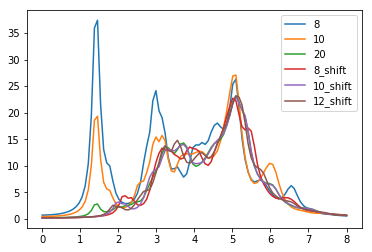

In [56]:
plt.plot(res_8.E,res_8.Im,label='8')
plt.plot(res_10.E,res_10.Im,label='10')
plt.plot(res_20.E,res_20.Im,label='20')
plt.plot(res_8_shift.E,res_8_shift.Im,label='8_shift')
plt.plot(res_10_shift.E,res_10_shift.Im,label='10_shift')
plt.plot(res_12_shift.E,res_12_shift.Im,label='12_shift')
#plt.plot(res.E,res.Re,label='re')
plt.legend()
plt.show()

we find peaks at 1.4, 3 and 5 eV. For the spectrum obtained with shifted samplings the heigth of the peak in gamma is much less strong and the spectrum are closer the experimental ones

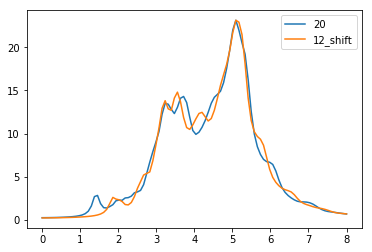

In [58]:
plt.plot(res_20.E,res_20.Im,label='20')
#plt.plot(res_8_shift.E,res_8_shift.Im,label='8_shift')
#plt.plot(res_10_shift.E,res_10_shift.Im,label='10_shift')
plt.plot(res_12_shift.E,res_12_shift.Im,label='12_shift')
plt.legend()
plt.show()

Show the spectrum associated to random and regular sampling close to Gamma

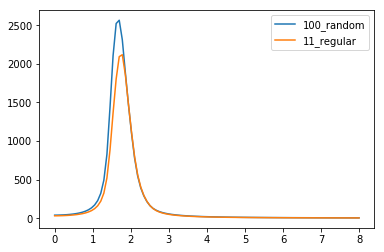

In [49]:
plt.plot(res_100_random.E,np.array(res_100_random.Im),label='100_random')
plt.plot(res_11_regular.E,np.array(res_11_regular.Im),label='11_regular')
plt.legend()
plt.show()